### 1. Importar librerías:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### 2. Abrir Archivos:

In [2]:
df_Yellow = pd.read_parquet('../Datasets/TLC_NYC/1. yellow_tripdata_2023-12.parquet')
df_Yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-12-01 00:06:06,2023-12-01 00:15:47,0.0,1.10,1.0,N,230,48,1,10.00,3.5,0.5,1.50,0.0,1.0,16.50,2.5,0.0
1,1,2023-12-01 00:22:26,2023-12-01 00:28:53,0.0,1.50,1.0,N,142,238,1,9.30,3.5,0.5,2.85,0.0,1.0,17.15,2.5,0.0
2,1,2023-12-01 00:59:44,2023-12-01 01:13:22,2.0,2.20,1.0,N,114,186,1,13.50,3.5,0.5,3.00,0.0,1.0,21.50,2.5,0.0
3,2,2023-12-01 00:22:17,2023-12-01 00:30:59,1.0,0.66,1.0,N,79,79,2,7.20,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
4,2,2023-12-01 00:18:16,2023-12-01 00:25:32,2.0,2.20,1.0,N,229,263,1,11.40,1.0,0.5,2.00,0.0,1.0,18.40,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376562,2,2023-12-31 23:04:34,2023-12-31 23:13:58,NaN,1.34,NaN,None,233,163,0,12.08,0.0,0.5,0.00,0.0,1.0,16.08,NaN,NaN
3376563,2,2023-12-31 23:08:15,2023-12-31 23:08:23,NaN,0.00,NaN,None,48,48,0,25.98,0.0,0.5,0.00,0.0,1.0,27.48,NaN,NaN
3376564,2,2023-12-31 23:16:15,2023-12-31 23:30:28,NaN,3.71,NaN,None,196,198,0,16.68,0.0,0.5,0.00,0.0,1.0,18.18,NaN,NaN
3376565,2,2023-12-31 23:21:58,2023-12-31 23:34:29,NaN,5.20,NaN,None,140,148,0,19.64,0.0,0.5,0.00,0.0,1.0,23.64,NaN,NaN


Contar registros:

In [3]:
Total_Registros_inicial= len(df_Yellow)
Total_Registros_inicial

3376567

In [4]:
df_Yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376567 entries, 0 to 3376566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

### 3. Eliminar columnas Innecesarias:

In [5]:
df_Yellow.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [6]:
columnas_eliminar = ['VendorID', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type']

Yellow = df_Yellow.drop(columns=columnas_eliminar)

### 4. Revisar Outliers:

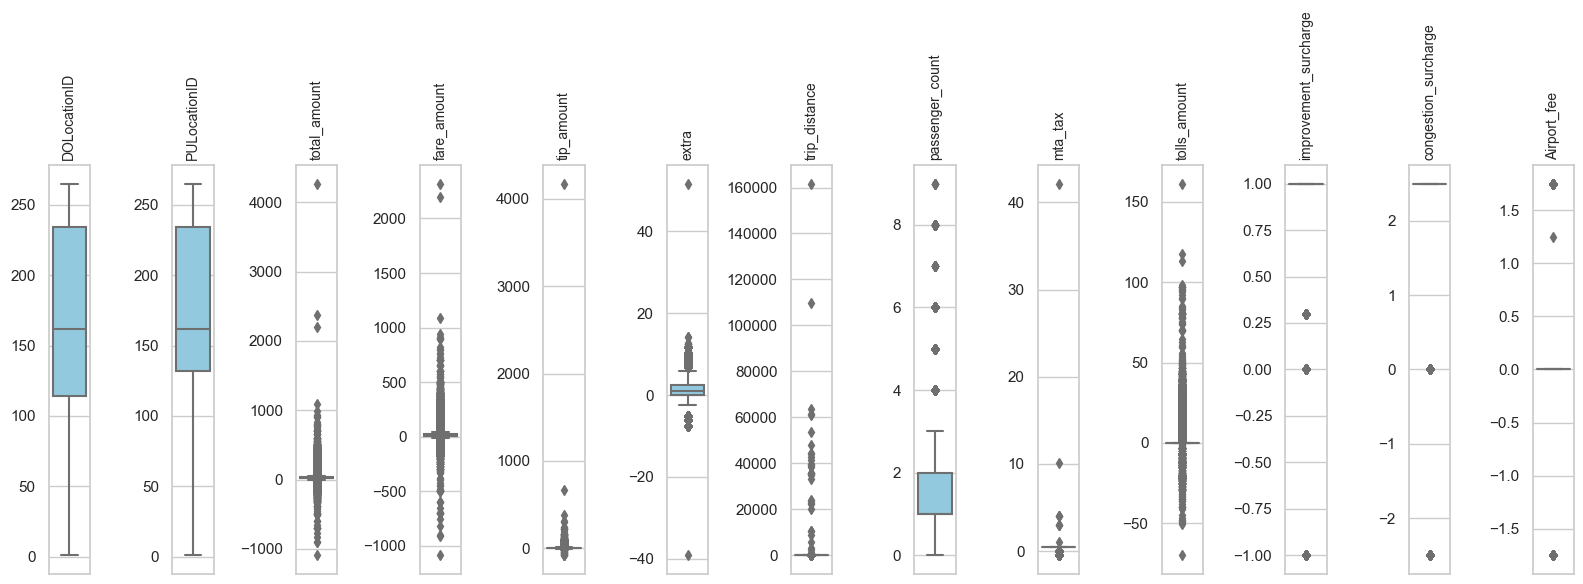

In [7]:
# Selecciona solo las columnas numéricas
df_numerical = Yellow.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

### 5. Convertir núemeros negativos a positivos:

In [8]:
# Crear una lista de las columnas en las que deseas convertir los valores negativos a positivos
columnas_a_convertir = ['fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee']

# Aplicar una función lambda a cada valor en cada una de esas columnas para cambiar los valores negativos a positivos
Yellow[columnas_a_convertir] = Yellow[columnas_a_convertir].applymap(lambda x: abs(x) if x < 0 else x)

### 6. Eliminar filas con "0" en "fare_amount" o menor a $3:

In [9]:
# Contar el número de filas antes de eliminar
filas_antes = len(Yellow)

# Eliminar las filas donde 'fare_amount' menor a 3 dólares (tarifa base taxis, $5 la de cancelación uber)
Yellow = Yellow[Yellow['fare_amount'] >= 3]

# Contar el número de filas después de eliminar
filas_despues = len(Yellow)

# Calcular cuántas filas se eliminaron
filas_eliminadas = filas_antes - filas_despues

print("Se eliminaron {} filas donde 'fare_amount' es menor a 3.".format(filas_eliminadas))


Se eliminaron 6399 filas donde 'fare_amount' es menor a 3.


### 7. Imputar valores errados:

In [10]:
# Calcula la moda de 'congestion_surcharge' y 'Airport_fee' excluyendo los valores cero
moda_congestion = Yellow[Yellow['congestion_surcharge'] != 0]['congestion_surcharge'].mode()[0]
moda_airport = Yellow[Yellow['Airport_fee'] != 0]['Airport_fee'].mode()[0]
moda_Improvement = Yellow[Yellow['improvement_surcharge'] != 0]['improvement_surcharge'].mode()[0]

# Imputa los valores erróneos utilizando la moda
Yellow['congestion_surcharge'] = Yellow['congestion_surcharge'].apply(lambda x: moda_congestion if x > 0 else x)
Yellow['Airport_fee'] = Yellow['Airport_fee'].apply(lambda x: moda_airport if x > 0 else x)
Yellow['Airport_fee'] = Yellow['improvement_surcharge'].apply(lambda x: moda_Improvement if x > 0 else x)


Pendiente imputación Extra hasta revisar horas

### 8. Recuento y eliminación de Outliers:

In [11]:
# Contar cuántos valores en 'base_passenger_fare' superan los 700 dólares
Tarifa_sobre_300 = (Yellow['fare_amount'] > 300).sum()

# Contar cuántos valores en 'trip_miles' superan las 100 millas
Millas_sobre_100 = (Yellow['trip_distance'] > 100).sum()

# Contar cuántos valores en 'tolls' superan llos $60 dólares
Peajes_sobre_60 = (Yellow['tolls_amount'] > 60).sum()

print("Cantidad de valores en 'base_passenger_fare' que superan los $300:", Tarifa_sobre_300)
print("Cantidad de valores en 'trip_miles' superan las 100 millas:", Millas_sobre_100)
print("Cantidad de valores en 'tolls' superan llos $60 dólare:", Peajes_sobre_60)

Cantidad de valores en 'base_passenger_fare' que superan los $300: 323
Cantidad de valores en 'trip_miles' superan las 100 millas: 65
Cantidad de valores en 'tolls' superan llos $60 dólare: 44


### 9. Eliminación de los Outliers:

In [12]:
# Eliminar las filas donde 'base_passenger_fare' supera los $400
Yellow = Yellow[Yellow['fare_amount'] <= 300] # No se considera real una tarifa mayor $150 y se permite que esta se duplique.

# Eliminar las filas donde 'trip_miles' supera las 100 millas
Yellow = Yellow[Yellow['trip_distance'] <= 100] # la distancia máxima sería 50 millas, se puede suponer ida y vuelta

# Eliminar las filas donde 'tolls' supera los $60 dólares
Yellow = Yellow[Yellow['tolls_amount'] <= 60]

### 10. Transformación de los datos de fecha:

In [13]:
# 1. Crear la columna "time_out" que sea la diferencia entre tpep_pickup_datetime y request_datetime
Yellow['time_out'] = 0 #En los taxis no hay registro, porque la mayoría son servicion recogidos por parada en la calle

# 2. Crear la columna "travel_time" que sea la diferencia entre dropoff_datetime y tpep_pickup_datetime
Yellow['travel_time'] = Yellow['tpep_dropoff_datetime'] - Yellow['tpep_pickup_datetime']

# 3. Convertir valores negativos en cero
Yellow['travel_time'] = Yellow['travel_time'].clip(lower=pd.Timedelta(0))

# 4. Crear las columnas "year", "month", "day", "hour" a partir de la columna tpep_pickup_datetime
Yellow['year'] = Yellow['tpep_pickup_datetime'].dt.year
Yellow['month'] = Yellow['tpep_pickup_datetime'].dt.month
Yellow['day'] = Yellow['tpep_pickup_datetime'].dt.day
Yellow['hour'] = Yellow['tpep_pickup_datetime'].dt.hour

# 5. Redondear la columna "hour" al entero más cercano (de 1 a 24)
Yellow['hour'] = Yellow['hour'].apply(lambda x: round(x))

# 6. Crear la columna "day_of_week" a partir de la columna tpep_pickup_datetime
Yellow['day_of_week'] = Yellow['tpep_pickup_datetime'].dt.day_name()

# 7. Eliminar las columnas tpep_pickup_datetime y dropoff_datetime
Yellow = Yellow.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


### 11. Transformar datos de tarifas:

Primero se imputan y corrigen valores de impuestos fijos según horarios:

In [14]:
# Definir una función para asignar los valores según la columna "hour"
def asignar_valor(row):
    if (row['hour'] >= 16 and row['hour'] <= 24) or (row['hour'] <= 6):
        return 1.5 if (row['hour'] >= 16 and row['hour'] <= 20) else 0.5
    else:
        return 0

# Aplicar la función a la columna extra
Yellow['extra'] = Yellow.apply(asignar_valor, axis=1)


Luego se unifican tarifa base y extras:

In [15]:
# Crear la columna "fare_surcharges" que sea la suma de tolls, mta_tax, congestion_surcharge, airport_fee
Yellow['fare_surcharges'] = Yellow['tolls_amount'] + Yellow['extra'] + Yellow['congestion_surcharge'] + Yellow['Airport_fee']

# Crear la columna "base_fare" que sea la suma de base_passenger_fare y sales_tax
Yellow['base_fare'] = Yellow['fare_amount'] + 0.8 # 0.5 MTA + 0.3 Improvement

# Eliminar las columnas de tarifas individuales
columnas_eliminar = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee']
Yellow = Yellow.drop(columns=columnas_eliminar)

### 12. Cambiar formato de tiempos de viaje y espera:

In [16]:
# Convertir los datos de timedelta64[us] a minutos y luego a un entero
Yellow['travel_time_minutes'] = Yellow['travel_time'] / pd.Timedelta(minutes=1)

# Convertir a entero
Yellow['travel_time_minutes'] = Yellow['travel_time_minutes'].astype(int)

# Convertir a entero de 32 bits
Yellow['time_out'] = Yellow['time_out'].astype('int32')
Yellow['travel_time'] = Yellow['travel_time_minutes'].astype('int32')

Yellow = Yellow.drop(columns=['travel_time_minutes'])

### 13. Verificar Outliers en tiempo de servicio:

In [17]:
# Servicios que superan 4 horas de trayecto
Servicio_sobre_4_hrs = (Yellow['travel_time'] > 240).sum()

print("Servicios que superan 4 horas de trayecto:", Servicio_sobre_4_hrs)

Servicios que superan 4 horas de trayecto: 2545


In [18]:
# Eliminar los registros donde el tiempo de trayecto supera las 4 horas (240 minutos)
Yellow =Yellow[Yellow['travel_time'] <= 240]

se deja especificado que igual deben elimnarse de existir.

### 14. Revisar variación de Outliers:

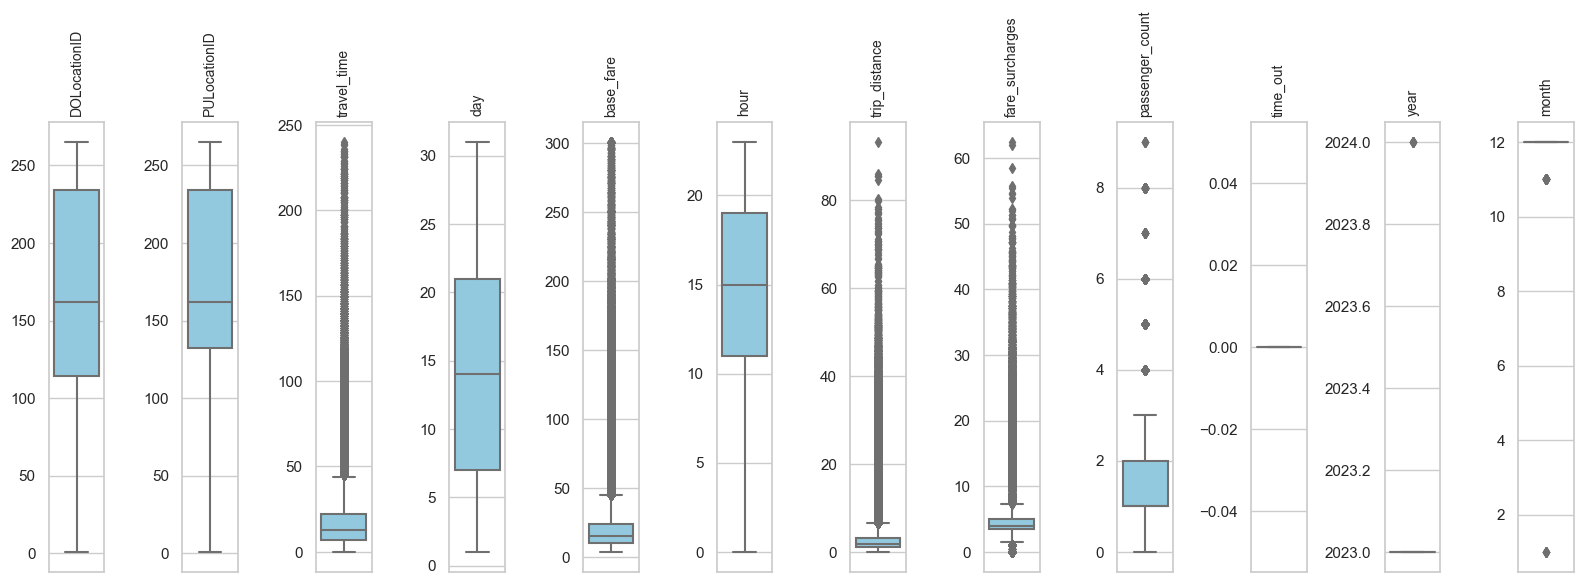

In [19]:
# Selecciona solo las columnas numéricas
df_numerical = Yellow.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

In [20]:
# Servicios que superan 4 horas de trayecto
moda_Año = Yellow[Yellow['year'] != 0]['year'].mode()[0]
moda_Mes = Yellow[Yellow['month'] != 0]['month'].mode()[0]

Año_diferente = (Yellow['year'] != moda_Año).sum()
Mes_diferente = (Yellow['month'] != moda_Mes).sum()

print('No. Registros con Año diferente: ',Año_diferente)
print('No. Registros con Mes diferente: ',Mes_diferente)

Yellow['year'] = Yellow['year'].apply(lambda x: moda_Año if x > 0 else x)
Yellow['month'] = Yellow['month'].apply(lambda x: moda_Mes if x > 0 else x)

No. Registros con Año diferente:  6
No. Registros con Mes diferente:  40


### 15. Agragar columnas auxiliares para definir nuevos outliers:

In [21]:
# Filtrar los registros donde trip_distance es cero y asignar un valor NaN
Yellow['$mile'] = np.where(Yellow['trip_distance'] != 0, Yellow['base_fare'] / Yellow['trip_distance'], np.nan)

# Filtrar los registros donde trip_minutes es cero y asignar un valor NaN
Yellow['$minute'] = np.where(Yellow['travel_time'] != 0, Yellow['base_fare'] / Yellow['travel_time'], np.nan)

Revisar porcentaje de elinnación de registros:

In [22]:
Total_Servicios_Sin_Outliers_extremos=len(Yellow)
Total_Servicios_Sin_Outliers_extremos

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_Servicios_Sin_Outliers_extremos)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 0.27999999999999997


### 16. Eliminar Outliers basado en rangos intercurtílicos:

In [23]:
# Calcular los cuartiles
Q1_mile = Yellow['$mile'].quantile(0.25)
Q3_mile = Yellow['$mile'].quantile(0.75)
IQR_mile = Q3_mile - Q1_mile

Q1_minute = Yellow['$minute'].quantile(0.25)
Q3_minute = Yellow['$minute'].quantile(0.75)
IQR_minute = Q3_minute - Q1_minute

# Multiplicador para rango intercuartílico:
multiplicador = 2

# Definir los límites superior e inferior
umbral_inf_mile = Q1_mile - multiplicador * IQR_mile
umbral_sup_mile = Q3_mile + multiplicador * IQR_mile

umbral_inf_minute =  Q3_minute - multiplicador * IQR_minute # para evitar borrar todos los registros
umbral_sup_minute = Q3_minute + multiplicador * IQR_minute

# Filtrar los registros que caen dentro del rango intercuartílico para cada columna
Yellow_filtrado = Yellow[
    (Yellow['$mile'] >= umbral_inf_mile) & (Yellow['$mile'] <= umbral_sup_mile) &
    (Yellow['$minute'] >= umbral_inf_minute) & (Yellow['$minute'] <= umbral_sup_minute)
]

# Calcular el promedio para las columnas filtradas
promedio_cost_mile_filtrado = Yellow_filtrado['$mile'].mean()
promedio_cost_minute_filtrado = Yellow_filtrado['$minute'].mean()

# Imprimir los resultados
print("Promedio de $/milla sin datos atípicos:", promedio_cost_mile_filtrado)
print("Promedio de $/minuto sin datos atípicos:", promedio_cost_minute_filtrado)


Promedio de $/milla sin datos atípicos: 8.40707347692723
Promedio de $/minuto sin datos atípicos: 1.3095756366096876


In [24]:
# Número de servicios con $mile sobre el umbral:
Cost_mile_sobre_umbral = (Yellow['$mile'] > umbral_sup_mile ).sum()

# Número de servicios con $time sobre el umbral:
Cost_minute_sobre_umbral = (Yellow['$minute'] > umbral_sup_minute).sum()

print(f'el número de registros sobre el umbral de $/milla es: {Cost_mile_sobre_umbral}')
print(f'el número de registros sobre el umbral de $/minuto es: {Cost_minute_sobre_umbral}')

el número de registros sobre el umbral de $/milla es: 122007
el número de registros sobre el umbral de $/minuto es: 130016


Verificar nivel de elimnación:

In [25]:
Total_servicios_Final=len(Yellow_filtrado)

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_servicios_Final)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 9.4


### 17. Eliminar datos con ubicaciones no definidas:

In [26]:
# Número de servicios con ubicación de recogida o llegada desconocido:
DO_location_264 = (Yellow_filtrado['DOLocationID'] == 264).sum()
DO_location_265 = (Yellow_filtrado['DOLocationID'] == 265).sum()
PU_location_264 = (Yellow_filtrado['PULocationID'] == 264).sum()
PU_location_265 = (Yellow_filtrado['PULocationID'] == 265).sum()

print('registros con ubicación DO 264 (NV): ',DO_location_264)
print('registros con ubicación DO 265 (NA): ',DO_location_265)
print('registros con ubicación PU 264 (NV): ',PU_location_264)
print('registros con ubicación PU 265 (NA): ',PU_location_265)

print('Total: ',PU_location_265+PU_location_264+DO_location_265+DO_location_264)

registros con ubicación DO 264 (NV):  15986
registros con ubicación DO 265 (NA):  6933
registros con ubicación PU 264 (NV):  11509
registros con ubicación PU 265 (NA):  356
Total:  34784


Eliminar registros:

In [27]:
# Eliminar los registros con DOLocationID igual a 264
Yellow_filtrado = Yellow_filtrado.loc[Yellow_filtrado['DOLocationID'] != 264]

# Eliminar los registros con DOLocationID igual a 265
Yellow_filtrado = Yellow_filtrado.loc[Yellow_filtrado['DOLocationID'] != 265]

# Eliminar los registros con PULocationID igual a 264
Yellow_filtrado = Yellow_filtrado.loc[Yellow_filtrado['PULocationID'] != 264]

# Eliminar los registros con PULocationID igual a 265
Yellow_filtrado = Yellow_filtrado.loc[Yellow_filtrado['PULocationID'] != 265]


Revisar nivel de elimanción:

In [28]:
Total_servicios_Final=len(Yellow_filtrado)

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_servicios_Final)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 10.190000000000001


### 18. Realizar agregaciones:

In [29]:
# Crear la columna "service_number" y asignar el valor 1 a todas las filas
Yellow_filtrado['service_number'] = 1

# Crear la columna "service_Type" y asignar el valor Yellow a todas las filas
Yellow_filtrado['service_type'] = 'Yellow'

# 
Yellow_filtrado.rename(columns={'trip_distance': 'trip_miles'}, inplace=True)


# Definir las dimensiones de agrupación y las variables de agregación
dimensiones = ['service_type','year', 'month', 'day', 'day_of_week','hour', 'PULocationID', 'DOLocationID']
variables_agregacion = ['trip_miles', 'time_out', 'travel_time', 'fare_surcharges', 'base_fare', 'service_number']

# Agrupar el DataFrame y calcular la suma de las variables de agregación
Yellow_agrupado = Yellow_filtrado.groupby(dimensiones)[variables_agregacion].sum().reset_index()

In [30]:
Yellow_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126072 entries, 0 to 1126071
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   service_type     1126072 non-null  object 
 1   year             1126072 non-null  int32  
 2   month            1126072 non-null  int32  
 3   day              1126072 non-null  int32  
 4   day_of_week      1126072 non-null  object 
 5   hour             1126072 non-null  int64  
 6   PULocationID     1126072 non-null  int32  
 7   DOLocationID     1126072 non-null  int32  
 8   trip_miles       1126072 non-null  float64
 9   time_out         1126072 non-null  int32  
 10  travel_time      1126072 non-null  int32  
 11  fare_surcharges  1126072 non-null  float64
 12  base_fare        1126072 non-null  float64
 13  service_number   1126072 non-null  int64  
dtypes: float64(3), int32(7), int64(2), object(2)
memory usage: 90.2+ MB


### 19. Reducir tamaño de archivo:

In [31]:
Yellow_agrupado['trip_miles'] = Yellow_agrupado['trip_miles'].astype('float32')
Yellow_agrupado['fare_surcharges'] = Yellow_agrupado['fare_surcharges'].astype('float32')
Yellow_agrupado['base_fare'] = Yellow_agrupado['base_fare'].astype('float32')

Yellow_agrupado['year'] = Yellow_agrupado['year'].astype('int16')
Yellow_agrupado['month'] = Yellow_agrupado['month'].astype('int16')
Yellow_agrupado['day'] = Yellow_agrupado['day'].astype('int16')
Yellow_agrupado['hour'] = Yellow_agrupado['hour'].astype('int16')
Yellow_agrupado['PULocationID'] = Yellow_agrupado['PULocationID'].astype('int16')
Yellow_agrupado['DOLocationID'] = Yellow_agrupado['DOLocationID'].astype('int16')
Yellow_agrupado['time_out'] = Yellow_agrupado['time_out'].astype('int16')
Yellow_agrupado['travel_time'] = Yellow_agrupado['travel_time'].astype('int16')
Yellow_agrupado['service_number'] = Yellow_agrupado['service_number'].astype('int16')

### 19. Exportar archivo a parquet:

In [32]:
Yellow_agrupado.to_parquet('../DataClean/Yellow_Agrupado.parquet')

In [33]:
Yellow_agrupado.describe()

,year,month,day,hour,PULocationID,DOLocationID,trip_miles,time_out,travel_time,fare_surcharges,base_fare,service_number
count,1126072.0,1126072.0,1.126072e+06,1.126072e+06,1.126072e+06,1.126072e+06,1.126072e+06,1126072.0,1.126072e+06,1.126072e+06,1.126072e+06,1.126072e+06
mean,2023.0,12.0,1.529687e+01,1.366170e+01,1.554222e+02,1.509708e+02,9.156627e+00,0.0,4.620592e+01,1.165736e+01,5.559505e+01,2.692896e+00
std,0.0,0.0,8.749280e+00,6.408123e+00,6.626081e+01,7.271221e+01,1.670248e+01,0.0,6.989743e+01,1.747703e+01,7.761372e+01,3.506591e+00
min,2023.0,12.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.500000e-01,0.0,2.000000e+00,0.000000e+00,3.800000e+00,1.000000e+00
25%,2023.0,12.0,8.000000e+00,9.000000e+00,1.130000e+02,9.000000e+01,2.880000e+00,0.0,1.600000e+01,3.500000e+00,2.090000e+01,1.000000e+00
50%,2023.0,12.0,1.500000e+01,1.400000e+01,1.480000e+02,1.480000e+02,5.280000e+00,0.0,2.800000e+01,7.000000e+00,3.520000e+01,1.000000e+00
75%,2023.0,12.0,2.200000e+01,1.900000e+01,2.300000e+02,2.300000e+02,9.700000e+00,0.0,5.200000e+01,1.200000e+01,6.350000e+01,3.000000e+00
max,2023.0,12.0,3.100000e+01,2.300000e+01,2.630000e+02,2.630000e+02,9.702900e+02,0.0,3.972000e+03,5.300000e+02,3.752400e+03,1.250000e+02
